In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import regex as re

disney_df = pd.read_csv('..\disney_plus_titles.csv')
disney_df.duration = disney_df.duration.str.strip(' min')

In [2]:
# 1) Create a new dataframe named "movies_df" with consisting of only movies.
movies_df = disney_df.loc[disney_df['type']=='Movie']
movies_df.duration = movies_df.duration.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
# 2) Create a new dataframe named "movie_ratings" from movies_df that consists of
# the top5 ratings by count. This dataframe should consist of only two columns,
# rating and count.
movie_ratings = movies_df.rating.value_counts().head(5)
movie_ratings = movie_ratings.reset_index()
movie_ratings = movie_ratings.rename(columns={'index':'rating','rating':'count'})
movie_ratings

,rating,count
0,G,235
1,PG,226
2,TV-G,224
3,TV-PG,165
4,PG-13,60


<AxesSubplot:xlabel='rating'>

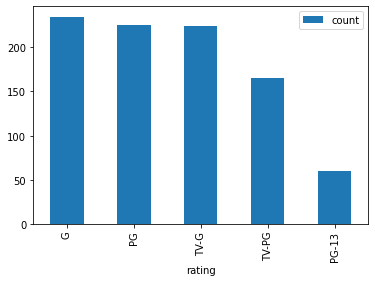

In [4]:
# 3) Use the movie_ratings dataframe to create a bar chart showing count of the
# top 5 ratings.
movie_ratings.plot(kind='bar', x='rating')

In [5]:
# 4) Using the movies_df, subset the data to create a new dataframe named
# "year_duration" that only consists of 2 columns, release_year and duration.
year_duration = movies_df[['release_year','duration']]

In [6]:
# 5) Find min, max, and average duration of movies from the 1975-1984.
year_duration['before_great_mouse_detective'] = (year_duration.release_year > 1975) & (year_duration.release_year < 1984) 
year_duration['before_great_mouse_detective'] = year_duration['before_great_mouse_detective'].astype(bool)
bgmd = year_duration.loc[year_duration['before_great_mouse_detective']==True]
bgmd['duration'] = pd.to_numeric(bgmd.duration)
print('The min duration is ' + str(min(year_duration.duration)))
print('The max duration is ' + str(max(year_duration.duration)))
print('The average duration is ' + str(np.mean(year_duration.duration)))

The min duration is 2
The max duration is 183
The average duration is 73.08072653884965


C:\Users\DAVIDC~1\AppData\Local\Temp/ipykernel_29188/3505208508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_duration['before_great_mouse_detective'] = (year_duration.release_year > 1975) & (year_duration.release_year < 1984)
C:\Users\DAVIDC~1\AppData\Local\Temp/ipykernel_29188/3505208508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_duration['before_great_mouse_detective'] = year_duration['before_great_mouse_detective'].astype(bool)
C:\Users\DAVIDC~1\AppData\Local\Temp/ipykernel_2918

<AxesSubplot:xlabel='release_year', ylabel='duration'>

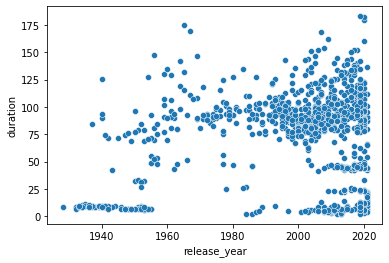

In [7]:
# 6) Create a scatterplot using year_duration that looks at movie durations
# over the years.  Do you notice any correlation?
sns.scatterplot(data=year_duration,
                x = 'release_year',
                y = 'duration')

# The higher the year, the longer the movie but not by much

In [8]:
# 7) Find the actual correlation value, is there any correlation?

year_duration[['duration','release_year']].corr()

# Very low correlation.

,duration,release_year
duration,1.000000,0.241268
release_year,0.241268,1.000000


In [9]:
# 8) Use movie_df to find which year had the most G-rated releases.  Can you do
# this in a single line of code?
movies_df.loc[movies_df.rating=='G'].value_counts(movies_df.release_year).head(1)


release_year
2003    12
dtype: int64

In [10]:
# 9) Which year had the most movie releases?  What percentage of movies that year
# had durations that were statistical outliers for that year?
print('most releases')
print(year_duration.value_counts(year_duration.release_year).head(1))
twentytwenty = year_duration.loc[year_duration.release_year==2020]
lowoutliers = twentytwenty.loc[twentytwenty.duration < 27]
highoutliers = twentytwenty.loc[twentytwenty.duration > 107]
print('outlying percent')
print(((len(highoutliers) + len(lowoutliers)) / len(twentytwenty) ) * 100 )

most releases
release_year
2020    72
dtype: int64
outlying percent
26.38888888888889


In [11]:
# 10) Create a new column in movies_df that catagorizes each movie as either
# short, average, or long.  Short movies should be 30 mins or less, long movies
# should be over 2 hours.
movies_df['length'] = ''

for movie, row in movies_df.iterrows() :
    if row.duration > 120 :
        movies_df.loc[movie, 'length'] = 'long'
    elif row.duration > 30 :
        movies_df.loc[movie, 'length'] = 'average'
    else :
     movies_df.loc[movie, 'length'] = 'short'

C:\Users\DAVIDC~1\AppData\Local\Temp/ipykernel_29188/2088418892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['length'] = ''
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:ylabel='length'>

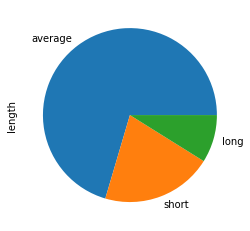

In [12]:
# 11) Make a pie chart of the above movie lengths.
movies_df.length.value_counts().plot(kind='pie')

In [13]:
# 14) Was any movie added on your birthday last year?

# Skipped ahead to run this before getting the column converted to DT
movies_df.loc[movies_df.date_added=='September 27, 2021']
#Nope. No movies on my birthday.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,length


In [14]:
# 12) Which movie had the greatest gap from the year it was released to the year
#  was added?  What is the average?
movies_df.date_added = pd.to_datetime(movies_df.date_added)
movies_df.release_year = pd.to_datetime(movies_df.release_year, format='%Y')
movies_df['stream_gap'] = ''

for index, row in movies_df.iterrows() :
    movies_df.stream_gap = movies_df.date_added - movies_df.release_year

print('Average stream gap is ' + str(np.mean(movies_df.stream_gap)))
print('Longest to stream ' + movies_df.title.loc[movies_df.stream_gap==max(movies_df.stream_gap)])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\DAVIDC~1\AppData\Local\Temp/ipykernel_29188/2355020807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['stream_gap'] = ''


Average stream gap is 7995 days 18:01:05.388496512
1146    Longest to stream Steamboat Willie
Name: title, dtype: object


In [15]:
# 13) How many movies were added during the first year after the pandemic
# lockdown? (Assume the lockdown began on March 16, 2020)
mask = (movies_df.date_added > '2020-03-16') & (movies_df.date_added < '2021-03-15')
lockdown = movies_df.loc[mask]
len(lockdown)

211

In [16]:
# 15) How many TV shows or Movies have the word 'dog' in the title regardless if
# it is capitalized?

dog = disney_df.title.str.findall('dog', flags=re.IGNORECASE)
dog.value_counts()
#Throws an error yet also gives an answer.

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]       1349
[Dog]      18
[dog]       1
Name: title, dtype: int64